# MNIST Handwritten Digit Recognition in PyTorch

Example taken from:

* Main source: https://towardsdatascience.com/a-simple-starter-guide-to-build-a-neural-network-3c2cf07b8d7c

* Complemented with: https://nextjournal.com/gkoehler/pytorch-mnist

* Application to recognise drawn digits: https://ashok.tanka.la/assets/examples/mnist/mnist.html

About variables and autograd, see: https://jhui.github.io/2018/02/09/PyTorch-Variables-functionals-and-Autograd/

## Import PyTorch

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

import matplotlib.pyplot as plt

## Initialize Hyper-parameters

In [2]:
input_size = 784       # The image size = 28 x 28 = 784
hidden_size = 500      # The number of nodes at the hidden layer
num_classes = 10       # The number of output classes. In this case, from 0 to 9
num_epochs = 5         # The number of times entire dataset is trained
batch_size = 100       # The size of input data took for one iteration
learning_rate = 0.001  # The speed of convergence

## Download MNIST Dataset

In [3]:
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=False)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

## Load the Dataset

We shuffle the loading process of train_dataset to make the learning process independent of data orderness, but the order of test_loader remains to examine whether we can handle unspecified bias order of inputs.

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

## Let's take a look at some examples. 
We'll use the test_loader for this.

In [5]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

# Let's see what one test data batch consists of
# --> we have [batch_size] examples of 28x28 pixels in grayscale (i.e. no rgb channels, hence the one). 
print("batch data:", example_data.shape)

print("Target data shape:", example_targets.shape)

batch data: torch.Size([100, 1, 28, 28])
Target data shape: torch.Size([100])


## Exercice: print pixel content of 1st image and its target value

Not very instructive but at least we see the raw values

In [6]:
print("Print pixel content of 1st image:", example_data[0][0])

print("Print target value of 1st image:", example_targets[0])

Print pixel content of 1st image: tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.00

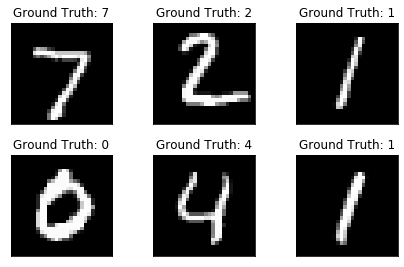

In [7]:
# Plot some examples with matplotlib
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
    
plt.show()

## Feedforward Neural Network Model using nn.Sequential

Use the nn package to define our model as a sequence of layers. nn.Sequential is a Module which contains other Modules, and applies them in sequence to produce its output. Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias.

### Exercice: test with dropout

### Exercice: implementation with two more layers

In [8]:
# Added two extra layers w.r.t default example
net = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),     # 1st Full-Connected Layer: 784 (input data) -> 500 (hidden node)
    torch.nn.ReLU(),                              # Non-Linear ReLU Layer: max(0,x)
    torch.nn.Linear(hidden_size, 250),            # Added extra Full-Connected Layer (test): 500 -> 250
    torch.nn.ReLU(),                              # Also with ReLU
    torch.nn.Linear(250,100),                     # Added extra Full-Connected Layer (test): 250 -> 100
    torch.nn.ReLU(),                              # Also with ReLU
    torch.nn.Linear(100, num_classes),            # Last Full-Connected Layer: 500 (hidden node) -> 10 (output class)
    torch.nn.Sigmoid(),                           # Add Sigmoid activation function on output layer
)

## Enable GPU 

In [9]:
# net.cuda()    # You can comment out this line to disable GPU

## Loss Function and Optimizer

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# alternative Stochastic Gradient Descent (give worse results and needs 20xlr and 20 epochs)
#optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [11]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(num_epochs + 1)]

In [12]:
print(test_counter)

[0, 60000, 120000, 180000, 240000, 300000]


## Train the FNN Model

Note: torch.nn only supports mini-batches. The entire torch.nn package only supports inputs that are a mini-batch of samples, and not a single sample. If you have a single sample, just use input.unsqueeze(0) to add a fake batch dimension.

In [13]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):   # Load a batch of images with its (index, data, class)
        images = Variable(images.view(-1, 28*28))         # Convert torch tensor to Variable: change image from a matrix of 28 x 28 from to a vector of size 784 (view works as numpy's reshape function)
        labels = Variable(labels)        
        
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = net(images)                             # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        
        if (i+1) % 100 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item()))
            
        if (i+1) % 10 == 0:                              # keep track of loss value
            train_losses.append(loss.item())
            train_counter.append(((i+1)*batch_size) + ((epoch)*len(train_loader.dataset)))

Epoch [1/5], Step [100/600], Loss: 1.6037
Epoch [1/5], Step [200/600], Loss: 1.5362
Epoch [1/5], Step [300/600], Loss: 1.5604
Epoch [1/5], Step [400/600], Loss: 1.5178
Epoch [1/5], Step [500/600], Loss: 1.5014
Epoch [1/5], Step [600/600], Loss: 1.5070
Epoch [2/5], Step [100/600], Loss: 1.4693
Epoch [2/5], Step [200/600], Loss: 1.4811
Epoch [2/5], Step [300/600], Loss: 1.5016
Epoch [2/5], Step [400/600], Loss: 1.5016
Epoch [2/5], Step [500/600], Loss: 1.4887
Epoch [2/5], Step [600/600], Loss: 1.4982
Epoch [3/5], Step [100/600], Loss: 1.4865
Epoch [3/5], Step [200/600], Loss: 1.4674
Epoch [3/5], Step [300/600], Loss: 1.4898
Epoch [3/5], Step [400/600], Loss: 1.4996
Epoch [3/5], Step [500/600], Loss: 1.4881
Epoch [3/5], Step [600/600], Loss: 1.4882
Epoch [4/5], Step [100/600], Loss: 1.4714
Epoch [4/5], Step [200/600], Loss: 1.5099
Epoch [4/5], Step [300/600], Loss: 1.4729
Epoch [4/5], Step [400/600], Loss: 1.4822
Epoch [4/5], Step [500/600], Loss: 1.4877
Epoch [4/5], Step [600/600], Loss:

## Evaluating the Model's Performance

Text(0, 0.5, 'Loss')

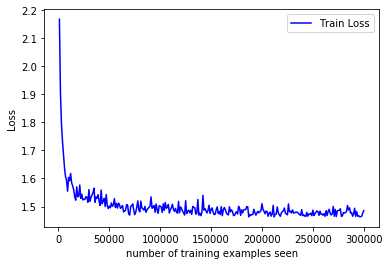

In [14]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
#plt.plot(test_counter, test_losses, color='red')
#plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('Loss')


## Test the FNN Model

Similar to training the neural network, we also need to load batches of test images and collect the outputs. The differences are that:
(1) No loss & weights calculation
(2) No weights update
(3) Has correct prediction calculation

In [15]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
    total += labels.size(0)                    # Increment the total count
    correct += (predicted == labels).sum()     # Increment the correct count
    
print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10K test images: 97 %


In [19]:
print(outputs.data)

tensor([[2.2098e-04, 6.7354e-06, 1.7316e-06, 2.8605e-07, 4.5592e-07, 5.5065e-04,
         2.7666e-04, 9.0499e-09, 1.0000e+00, 1.3469e-09],
        [3.6932e-08, 5.2896e-13, 2.4443e-11, 8.0638e-11, 1.5990e-06, 4.4117e-09,
         9.1727e-18, 1.9598e-09, 7.8197e-09, 1.0000e+00],
        [1.0000e+00, 4.3221e-24, 1.9334e-10, 1.5971e-13, 3.8311e-16, 2.5207e-11,
         1.5496e-08, 3.6873e-11, 1.9234e-11, 5.1604e-10],
        [8.7299e-18, 1.0000e+00, 3.8254e-08, 9.8084e-13, 5.4680e-04, 1.9788e-13,
         2.6560e-11, 1.8558e-08, 4.2196e-09, 1.4119e-14],
        [9.8180e-01, 4.7256e-10, 9.9923e-01, 1.7355e-01, 6.4312e-07, 2.6220e-04,
         7.3889e-06, 2.4633e-07, 1.7869e-04, 1.3065e-06],
        [1.1309e-07, 2.9944e-10, 2.8700e-03, 9.9981e-01, 1.1176e-16, 1.6197e-08,
         6.3138e-23, 3.0660e-04, 2.2441e-03, 4.9666e-03],
        [2.3255e-05, 2.1596e-08, 1.3131e-04, 5.7340e-12, 1.0000e+00, 1.0965e-06,
         5.1370e-06, 4.0638e-07, 5.7455e-09, 3.1258e-07],
        [3.7737e-06, 4.7956

In [16]:
torch.max(outputs.data,1)

torch.return_types.max(
values=tensor([1.0000, 1.0000, 1.0000, 1.0000, 0.9992, 0.9998, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 0.9810, 1.0000, 1.0000, 0.9999, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 0.9996, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        0.9989, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9789,
        1.0000, 0.9995, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000]),
indices=tensor([8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9

In [17]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [18]:
# Save the model for future implementations
#torch.save(net.state_dict(), 'fnn_model.pkl')